In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading the data
data = pd.read_csv("../Hackethon/LoanPrediction/LReg/trainm.csv")
data.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0,NaN
1,4583,1508,128.0
2,3000,0,66.0


In [3]:
#viewing NANs
data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
dtype: int64

In [4]:
#loan amount can't be null, we will replace it with mean of the column for time being
data.LoanAmount = data["LoanAmount"].fillna(data.LoanAmount.mean())

In [42]:
#no NAs now
data.isnull().sum()
#scale the variable standardization
data = (data -data.mean())/data.std()
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.541996,-0.816409,0.000000
1,0.066435,-0.186787,-0.152731
2,-0.528204,-0.816409,-0.978262
3,-0.684847,0.168106,-0.259251
4,0.598718,-0.816409,0.020364


In [95]:
#splitting the variables into predictors and response sets
var_x = data.iloc[:,0:2]
var_Y = data.iloc[:,2:]




In [96]:
#add the intercept
var_x["intercept"] = 1
#convert into numpy arrays for fast computations
X = np.array(var_x)
Y = np.array(var_Y).flatten()
#defining beta
#here we have 2 predictors
beta  =np.array([0,0,0])

In [97]:
# create the cost function
def getCost(X,Y,beta):
    m = len(Y)
    j = np.sum((X.dot(beta)-Y)**2)/(2*m)
    return j

In [98]:
costm = getCost(X,Y,beta)

In [99]:
costm


0.48571428571428593

In [112]:
alpha = .001
iters = 2000

In [113]:
#graident descent implementation

def gd(X,Y,beta,alpha,iters):
    m = len(Y)
    cost_histry = [0]*iters
    for i in range(iters):
        hypothesis = X.dot(beta)
        loss = hypothesis- Y
        GD = X.T.dot(loss)/m
        beta = beta -alpha*GD
        costm = getCost(X,Y,beta)
        cost_histry[i]= costm
    return beta, cost_histry
    

In [114]:
B,costF = gd(X,Y,beta,alpha,iters)

In [115]:
nd = np.array([0.541996,-0.816409,1])

In [116]:
nd.dot(B)

-0.11827508246601853

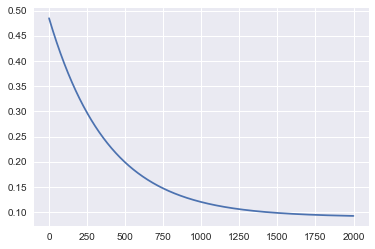

In [117]:
plt.plot(costF)